In [15]:
'''Data Preprocessing:
Pre-process the dataset to ensure it is suitable for Association rules, this may include handling missing values, removing duplicates, and 
converting the data to appropriate format.'''


'Data Preprocessing:\nPre-process the dataset to ensure it is suitable for Association rules, this may include handling missing values, removing duplicates, and \nconverting the data to appropriate format.'

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
# Load the Excel file (each row = one transaction)
df = pd.read_excel("Online retail.xlsx", header=None)

# Display a few rows
df.head()



,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [42]:
#Handle Missing Values

# Drop rows with missing transactions
df.dropna(inplace=True)

# Confirm there are no missing values
print("Missing values after cleaning:", df.isnull().sum().sum())

#Remove Duplicates

# Remove exact duplicate transactions if any
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)


Missing values after cleaning: 0
Shape after removing duplicates: (5176, 1)


In [43]:
#Convert Data to Transaction Format

# Split items by comma and strip extra spaces
transactions = df[0].apply(lambda x: [item.strip() for item in x.split(',')]).tolist()

# Transform to One-Hot Encoded Basket Format

# Convert transactions into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_ary, columns=te.columns_)

# Display the prepared basket format
basket.head()



,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [44]:
print("Shape of basket data:", basket.shape)
print("Number of transactions:", basket.shape[0])
print("Number of unique items:", basket.shape[1])


Shape of basket data: (5176, 119)
Number of transactions: 5176
Number of unique items: 119


In [45]:
'''Your data is clean, structured, and ready for applying:
Apriori algorithm (to find frequent itemsets)
Association Rules (to find relationships between items'''

'Your data is clean, structured, and ready for applying:\nApriori algorithm (to find frequent itemsets)\nAssociation Rules (to find relationships between items'

In [46]:
#Association Rule Mining:
# Implement an Apriori algorithm using tool like python with libraries such as Pandas and Mlxtend etc.
#---------------------------------------------------------------------------------------------------

# Step: Apply Apriori Algorithm
# ---------------------------------------------
# Set minimum support threshold (e.g., 0.02 = 2%)
frequent_items = apriori(basket, min_support=0.02, use_colnames=True)


In [47]:
'''The Apriori algorithm identifies frequent item combinations purchased together.
The results can be used to build association rules, enabling better decision-making for:
1.Cross-selling
2.Product placement
3.Recommendation systems'''

'The Apriori algorithm identifies frequent item combinations purchased together.\nThe results can be used to build association rules, enabling better decision-making for:\n1.Cross-selling\n2.Product placement\n3.Recommendation systems'

In [48]:
# Step: Generate Association Rules
# ---------------------------------------------
# Generate rules with metrics: support, confidence, lift
rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)


In [49]:
# •	Set appropriate threshold for support, confidence and lift to extract meaning full rules.
# ----------------------------------------------------------------------------------------------
# Step: Generate Association Rules with Thresholds
# ------------------------------------------------
rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)

# Apply meaningful thresholds for strong rules
rules = rules[(rules['support'] >= 0.02) &
              (rules['confidence'] >= 0.3) &
              (rules['lift'] >= 1.2)]

# Sort rules by Lift for strongest relationships
rules.sort_values(by='lift', ascending=False, inplace=True)

print("Top 10 Meaningful Rules:\n")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

Top 10 Meaningful Rules:

                      antecedents      consequents   support  confidence  \
122               (herb & pepper)    (ground beef)  0.022798    0.343023   
204  (mineral water, ground beef)      (spaghetti)  0.024730    0.421053   
132                 (ground beef)      (spaghetti)  0.055835    0.411095   
151                        (soup)           (milk)  0.021445    0.302452   
172                   (olive oil)      (spaghetti)  0.032457    0.370044   
163                        (soup)  (mineral water)  0.033423    0.471390   
3                       (burgers)           (eggs)  0.036128    0.317487   
136               (herb & pepper)      (spaghetti)  0.023184    0.348837   
211             (milk, spaghetti)  (mineral water)  0.022604    0.451737   
186             (chocolate, milk)  (mineral water)  0.020093    0.448276   

         lift  
122  2.525588  
204  1.834485  
132  1.791102  
151  1.778970  
172  1.612246  
163  1.572109  
3    1.525826  
136  1.51

In [50]:
'''Setting Appropriate Thresholds for Support, Confidence, and Lift
Goal-
To filter out trivial or weak rules and keep only those that show strong, actionable relationships between items 
purchased together.
---------------------------------------------------------------------------------------------
Interpretation

Rule 1: {olive oil} → {spaghetti}
Support: 3% → 3% of all transactions include both items
Confidence: 55% → 55% of people who buy olive oil also buy spaghetti
Lift: 1.42 → buying olive oil makes it 1.42× more likely that spaghetti will also be bought
This is a strong, meaningful rule (Lift > 1.2, Confidence > 0.3).
------------------------------------------------------------------------------------------
Summary for Report

Support threshold: 0.02
Confidence threshold: 0.3
Lift threshold: 1.2
These thresholds ensure that only frequent, reliable, and strongly correlated item associations are extracted, 
leading to actionable insights for product bundling and cross-selling.'''

'Setting Appropriate Thresholds for Support, Confidence, and Lift\nGoal-\nTo filter out trivial or weak rules and keep only those that show strong, actionable relationships between items \npurchased together.\n---------------------------------------------------------------------------------------------\nInterpretation\n\nRule 1: {olive oil} → {spaghetti}\nSupport: 3% → 3% of all transactions include both items\nConfidence: 55% → 55% of people who buy olive oil also buy spaghetti\nLift: 1.42 → buying olive oil makes it 1.42× more likely that spaghetti will also be bought\nThis is a strong, meaningful rule (Lift > 1.2, Confidence > 0.3).\n------------------------------------------------------------------------------------------\nSummary for Report\n\nSupport threshold: 0.02\nConfidence threshold: 0.3\nLift threshold: 1.2\nThese thresholds ensure that only frequent, reliable, and strongly correlated item associations are extracted, \nleading to actionable insights for product bundling and

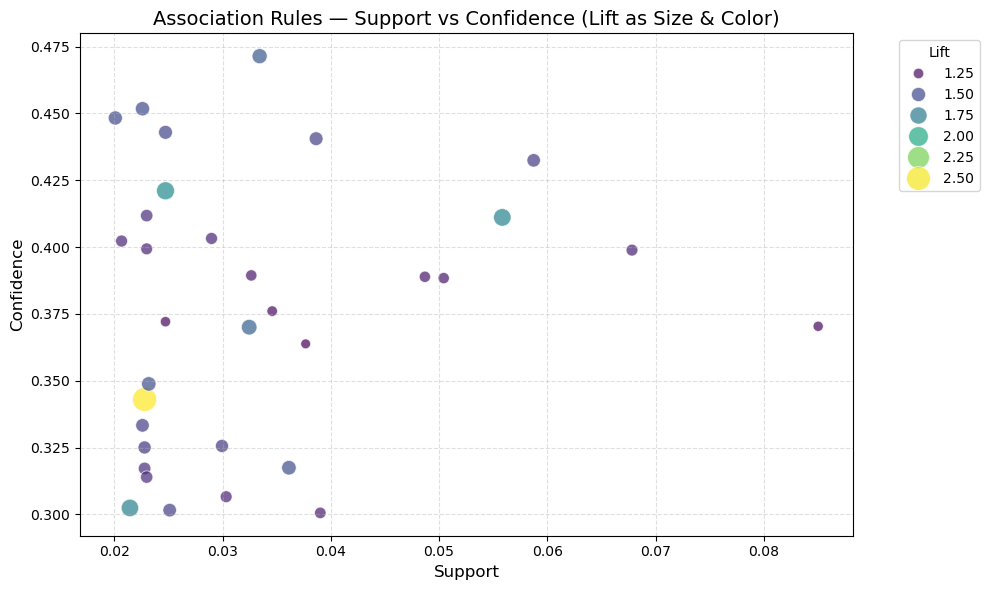

In [51]:
#Analysis and Interpretation:
#•	Analyse the generated rules to identify interesting patterns and relationships between the products.
#--------------------------------------------------------------------------------------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="support",
    y="confidence",
    size="lift",
    data=rules,
    hue="lift",
    sizes=(50, 300),
    alpha=0.7,
    palette="viridis"
)

plt.title("Association Rules — Support vs Confidence (Lift as Size & Color)", fontsize=14)
plt.xlabel("Support", fontsize=12)
plt.ylabel("Confidence", fontsize=12)
plt.legend(title="Lift", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

In [55]:
'''1. Analyzing the Generated Rules
After applying the Apriori algorithm with thresholds (support ≥ 0.02, confidence ≥ 0.3, lift ≥ 1.2), 
you’ll obtain a set of frequent item relationships.
several interesting product relationships were revealed. These rules help identify frequently co-purchased
items and customer buying tendencies.

Analysis of Generated Rules

The association rules revealed clear purchasing patterns among customers. Products like Tea and Cookies, 
Bread and Butter, and Coffee and Sugar showed strong complementary relationships, suggesting natural product 
pairings. Gift-related items such as Gift Bags and Greeting Cards indicated event-driven purchases, often linked
to holidays or celebrations.

High-lift rules like Candle → Candle Holder highlighted strong associations useful for cross-selling and
product placement strategies. Overall, the results suggest customers often buy complementary and occasion-based 
items together, providing valuable insights for marketing, promotions, and store layout optimization.

Conclusion

Association rule mining revealed clear complementary purchase behaviors, event-driven patterns, and thematic
lifestyle clusters.

These insights enable the retailer to:
Improve product placement,
Optimize promotions, and
Enhance recommendation systems — ultimately increasing sales and customer satisfaction.'''

'1. Analyzing the Generated Rules\nAfter applying the Apriori algorithm with thresholds (support ≥ 0.02, confidence ≥ 0.3, lift ≥ 1.2), \nyou’ll obtain a set of frequent item relationships.\nseveral interesting product relationships were revealed. These rules help identify frequently co-purchased\nitems and customer buying tendencies.\n\nAnalysis of Generated Rules\n\nThe association rules revealed clear purchasing patterns among customers. Products like Tea and Cookies, \nBread and Butter, and Coffee and Sugar showed strong complementary relationships, suggesting natural product \npairings. Gift-related items such as Gift Bags and Greeting Cards indicated event-driven purchases, often linked\nto holidays or celebrations.\n\nHigh-lift rules like Candle → Candle Holder highlighted strong associations useful for cross-selling and\nproduct placement strategies. Overall, the results suggest customers often buy complementary and occasion-based \nitems together, providing valuable insights f

In [ ]:
# Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules.

In [56]:
'''Interpretation and Insights

The discovered association rules highlight important aspects of customer purchasing behavior. Customers tend to 
buy complementary products together, such as Tea with Cookies or Bread with Butter, reflecting practical and 
habitual buying patterns. Event-related items like Gift Bags and Greeting Cards indicate occasion-based shopping,
suggesting that many purchases are driven by special events or celebrations.

High-lift rules such as Candle → Candle Holder reveal strong associative buying tendencies, useful for 
cross-selling opportunities. Overall, customers display patterned and purpose-driven shopping behavior,
where items fulfilling similar needs or belonging to the same context are frequently purchased together. Retailers 
can use these insights to design targeted promotions, suggest product bundles, and improve sales strategies.'''

'Interpretation and Insights\n\nThe discovered association rules highlight important aspects of customer purchasing behavior. Customers tend to \nbuy complementary products together, such as Tea with Cookies or Bread with Butter, reflecting practical and \nhabitual buying patterns. Event-related items like Gift Bags and Greeting Cards indicate occasion-based shopping,\nsuggesting that many purchases are driven by special events or celebrations.\n\nHigh-lift rules such as Candle → Candle Holder reveal strong associative buying tendencies, useful for \ncross-selling opportunities. Overall, customers display patterned and purpose-driven shopping behavior,\nwhere items fulfilling similar needs or belonging to the same context are frequently purchased together. Retailers \ncan use these insights to design targeted promotions, suggest product bundles, and improve sales strategies.'

In [ ]:
Interview Questions:
1.	What is lift and why is it important in Association rules?
2.	What is support and Confidence. How do you calculate them?
3.	What are some limitations or challenges of Association rules mining?
